In [1]:
import os
import torch
import pandas as pd
import numpy as np
import seaborn as sns
from torch.utils.data import Dataset, random_split, DataLoader
from PIL import Image
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
%matplotlib inline

In [2]:
initial_path = os.getcwd()
data_path = os.path.join(initial_path, 'sample_images')

In [3]:
dp = ImageFolder(data_path)
len(dp)

3

In [4]:
class_list = list(dp.class_to_idx.keys())
class_list

['brainstem']

In [5]:
dp[0], dp[1], dp[2]


((<PIL.Image.Image image mode=RGB size=296x264 at 0x2C07FCF55E0>, 0),
 (<PIL.Image.Image image mode=RGB size=296x264 at 0x2C06F534160>, 0),
 (<PIL.Image.Image image mode=RGB size=296x264 at 0x2C07FCF5640>, 0))

Label (numeric): 0
Label (textual): brainstem


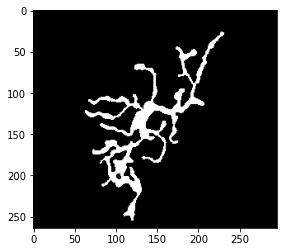

In [6]:
image, label = dp[0]
plt.imshow(image, cmap='gray')
print('Label (numeric):', label)
print('Label (textual):', class_list[label])

Label (numeric): 0
Label (textual): brainstem


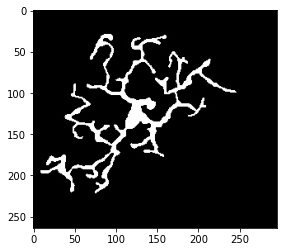

In [7]:
image, label = dp[1]
plt.imshow(image, cmap='gray')
print('Label (numeric):', label)
print('Label (textual):', class_list[label])

Label (numeric): 0
Label (textual): brainstem


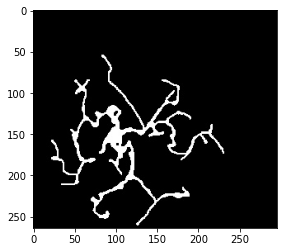

In [8]:
image, label = dp[2]
plt.imshow(image, cmap='gray')
print('Label (numeric):', label)
print('Label (textual):', class_list[label])

# dataset.csv (join rat types)

In [24]:
#fraclac to TG-PLX dataset
df = pd.read_csv('rat_type.csv', sep = ';')

In [25]:
df.head()

,microglia,Mean(Branch length),Mean(V1 x),Mean(V1 y),Mean(V2 x),Mean(V2 y),Mean(Euclidean distance),Mean(running average length),# Branches,# Junctions,...,diameter_bounding_circle,mean_radius,max_span_across_convex_hull,max_min_radii,shape_mean_fg,cell_area,cell_perimeter,roughness,cell_circularity,Type
0,1,12.462.821.428.571.400,8.351.492.857.142.850,10.439.899.999.999.900,8.861.082.142.857.140,10.466.032.142.857.100,10.895.999.999.999.900,11.039.714.285.714.200,28,13,...,190.683,779.961,190.683,21.264,2974,10.997.717.311.906.500,7.808.108.108.108.100,16.795.679.362.934.800,0.022668,TG PLX
1,2,1.414.570.967.741.930,4.317.467.741.935.480,4.498.432.258.064.510,456.333.870.967.742,4.708.893.548.387.090,11.661.032.258.064.500,12.657.483.870.967.700,31,15,...,189.695,815.226,1.866.815,19.852,3619,13.382.898.100.803.500,10.100.675.675.675.600,20.123.477.518.051.900,0.016484,TG PLX
2,3,15.337.042.553.191.400,9.830.051.063.829.780,7.426.046.808.510.640,1.051.635.319.148.930,7.398.802.127.659.570,13.241.000.000.000.000,13.834.234.042.553.100,50,24,...,2.853.279,1.208.175,2.853.279,18.656,4819,17.820.443.754.565.300,1.716.081.081.081.080,24.653.220.298.023.800,0.007604,TG PLX
3,4,13.760.483.870.967.700,7.804.890.322.580.640,81.786,8.070.425.806.451.610,833.989.677.419.355,11.126.774.193.548.300,12.277.774.193.548.300,31,15,...,189.695,807.549,1.866.815,19.925,3605,1.333.112.673.484.290,9.820.945.945.945.940,19.621.634.516.417.100,0.017369,TG PLX
4,5,11.607.160.714.285.700,7.398.730.357.142.850,8.328.619.642.857.130,7.826.658.928.571.420,8.256.767.857.142.850,9.881.964.285.714.270,1.021.867.857.142.850,56,27,...,2.426.834,102.914,2.425.881,21.504,5116,18.918.736.303.871.400,15.068.918.918.918.900,2.415.164.493.624.340,0.010470,TG PLX


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   microglia                     870 non-null    int64  
 1   Mean(Branch length)           870 non-null    object 
 2   Mean(V1 x)                    870 non-null    object 
 3   Mean(V1 y)                    870 non-null    object 
 4   Mean(V2 x)                    870 non-null    object 
 5   Mean(V2 y)                    870 non-null    object 
 6   Mean(Euclidean distance)      870 non-null    object 
 7   Mean(running average length)  870 non-null    object 
 8   # Branches                    870 non-null    int64  
 9   # Junctions                   870 non-null    int64  
 10  # End-point voxels            870 non-null    int64  
 11  # Junction voxels             870 non-null    int64  
 12  # Slab voxels                 870 non-null    int64  
 13  Avera

In [45]:
df.describe()

,microglia,# Branches,# Junctions,# End-point voxels,# Junction voxels,# Slab voxels,# Triple points,# Quadruple points,animal,lacunarity,outline_mean_fg,density,convex_hull_area,convex_hull_circularity,shape_mean_fg,cell_circularity
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,110.935632,37.847126,18.139080,19.960920,59.267816,597.352874,16.842529,1.234483,2.714943,0.349359,1788.416092,0.095897,19201.272414,0.795501,3732.271264,0.016877
std,65.560190,13.522460,6.723383,6.556357,22.029392,176.296704,6.379757,1.146449,1.342972,0.038757,534.864171,0.013853,6747.060222,0.070878,1129.168656,0.008092
min,1.000000,11.000000,5.000000,7.000000,17.000000,207.000000,4.000000,0.000000,1.000000,0.237800,608.000000,0.059000,4742.000000,0.460900,1275.000000,0.005022
25%,55.000000,28.000000,13.000000,15.000000,44.000000,465.000000,12.000000,0.000000,2.000000,0.323825,1395.750000,0.085900,14248.500000,0.754675,2932.500000,0.011289
50%,109.000000,36.000000,17.000000,19.000000,55.500000,584.500000,16.000000,1.000000,3.000000,0.349650,1744.500000,0.095150,18707.500000,0.805300,3581.000000,0.015094
75%,163.750000,46.000000,22.000000,24.000000,72.000000,700.000000,20.000000,2.000000,4.000000,0.374400,2095.000000,0.104375,23109.250000,0.848175,4359.000000,0.019977
max,248.000000,108.000000,52.000000,54.000000,189.000000,1354.000000,46.000000,6.000000,5.000000,0.477800,4072.000000,0.145400,44492.000000,0.938400,8845.000000,0.086617


In [42]:
pde = pd.to_numeric(df['fractal_dimension'],errors='coerce')

In [46]:
pde.describe()

count    842.000000
mean      13.410963
std        3.527180
min        1.295000
25%       14.013500
50%       14.377000
75%       14.714250
max       16.088000
Name: fractal_dimension, dtype: float64

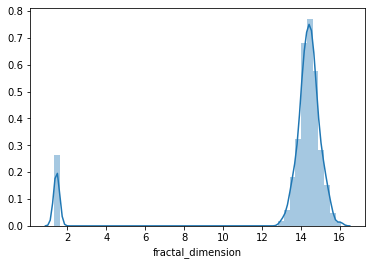

In [43]:
sns.distplot(pde)

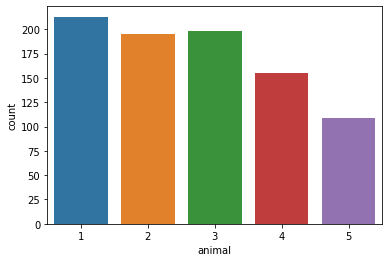

In [29]:
sns.countplot(x='animal', data=df)

In [30]:
df['animal'].value_counts()

1    213
3    198
2    195
4    155
5    109
Name: animal, dtype: int64

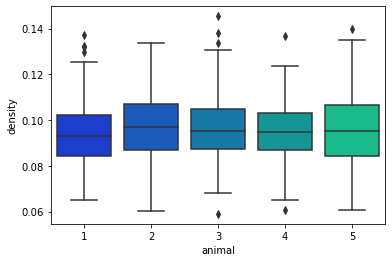

In [31]:
sns.boxplot(x='animal',y='density',data=df,palette='winter')

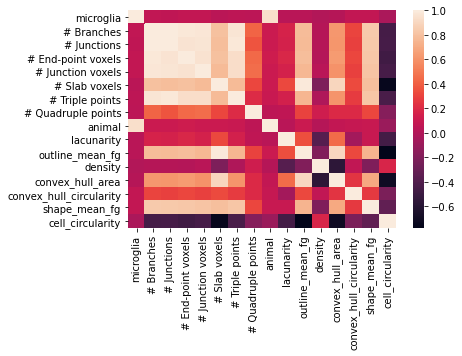

In [32]:
sns.heatmap(df.corr())

# Analyzing Dataset - VAE

In [33]:
import numpy as np
#Import images with 64x64 resolution
img_64 = np.load('Microglia_Data/Images_VAE/64x64/array_of_images_64_64_20210316.npy')
label_64= np.load('Microglia_Data/Images_VAE/64x64/array_of_labels_64_64_20210316.npy')
#Import images with 256x256 resolution
img_256 = np.load('Microglia_Data/Images_VAE/256x256/array_of_images_256_256_20210402_FULL.npy')
label_256 = np.load('Microglia_Data/Images_VAE/256x256/array_of_labels_256_256_20210402_FULL.npy')

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def analyze_data(img_list, img_labels, title):
    print(50*'*')
    print("Images (X) shape:", img_list.shape)
    print("Images (y) shape:", img_labels.shape)
    visualize_data(img_list, img_labels, title)
    print(50*'*')

#Matplotlib it
def visualize_data(img_list, img_labels, title):
    #a set of 9 figures
    fig = plt.figure(figsize=(8,8))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(tf.squeeze(img_list[i]))

**************************************************
Images (X) shape: (1320, 64, 64, 1)
Images (y) shape: (1320,)
**************************************************


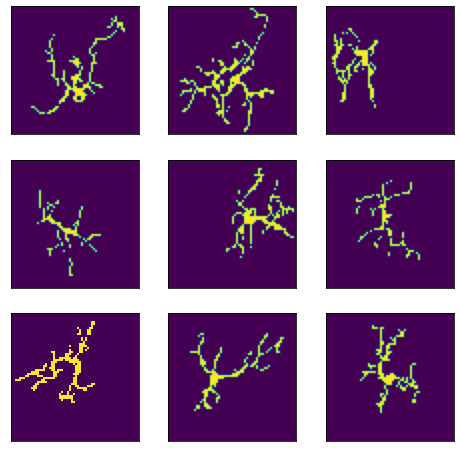

In [36]:
#Analyzing 64x64 images data
analyze_data(img_64, label_64, 'teste')

**************************************************
Images (X) shape: (2196, 256, 256, 1)
Images (y) shape: (2196,)
**************************************************


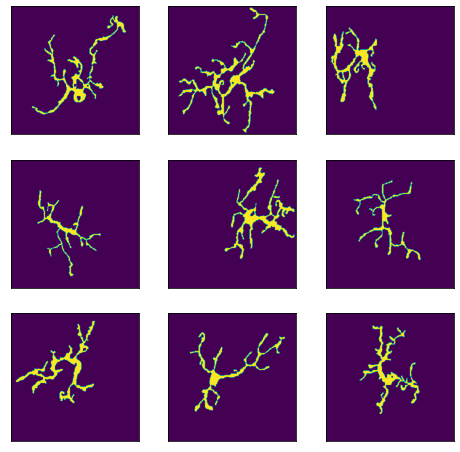

In [37]:
#Analyzing 256x256 images data
analyze_data(img_256, label_256, 'teste')